In [2]:
#Loaded Packeages needed for the modeling part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import joblib

In [3]:
# Read in the csv file for machine learning 
df = pd.read_csv('Data/FinalMetaScore.csv',encoding='utf8')
df.head()

,00,000,007,03,06,07,08,09,10,100,...,zeppelin,zero,zeu,zip,zodiac,zombi,zone,zoo,zoom,metascore
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.078962,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [4]:
#Seperated the X and y values
X = df.drop(columns='metascore')
y = df.metascore

In [5]:
#Useed a train test split on the data for training purposes
X_remain,X_test,y_remain,y_test = train_test_split(X,y,test_size=.3,random_state=1)

In [6]:
#By using a Standard Scaler, scaled the data
SS = StandardScaler(with_mean=False)
SS.fit(X_remain)
XremainS = SS.transform(X_remain)
XtestS = SS.transform(X_test)

In [7]:
#Dumped the model for future use
joblib.dump(SS,'Models/StandardScaler.plk')

['Models/StandardScaler.plk']

In [8]:
%%time
#Initial test of Log model baseline
logSS = LogisticRegression(n_jobs=-1,max_iter=100)
logSS.fit(XremainS,y_remain)
print(logSS.score(XremainS,y_remain))
print(logSS.score(XtestS,y_test))

0.9754126351735913
0.649003984063745
Wall time: 2min 59s


1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1
10
100
1000
10000
100000
1000000
10000000


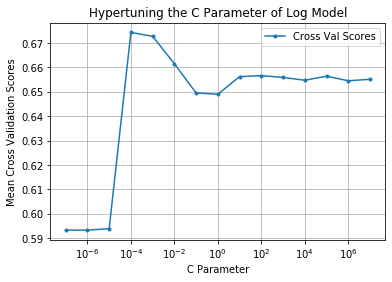

Wall time: 6min 49s


In [9]:
%%time
#Using Cross Validation score, found the mean score of 5 loops of the train data at different C values too see which C
#value gives the best score.
C = [10**x for x in range(-7,8)]
score = []
for c in C:
    print(c)
    logSSCV = LogisticRegression(C=c,n_jobs=-1,max_iter = 100)
    scores = np.mean(cross_val_score(logSSCV,XremainS,y_remain,cv=5,n_jobs=-1))
    score.append(np.mean(scores))
    
#Plotted the mean cross val score against the C values.
plt.figure()
plt.plot(C,score,marker ='.',label = 'Cross Val Scores')
plt.xscale('log')
plt.legend()
plt.title('Hypertuning the C Parameter of Log Model')
plt.xlabel('C Parameter')
plt.ylabel('Mean Cross Validation Scores')
plt.grid()
plt.show()

C = 0.0001 gives the best mean cross validation score

In [10]:
%%time
#Fitted a final model for the log model.
log_final = LogisticRegression(C=0.0001,n_jobs=-1,max_iter=100)
log_final.fit(XremainS,y_remain)
log_y_pred = log_final.predict(XtestS)

Wall time: 1min 48s


In [20]:
pd.DataFrame(confusion_matrix(y_test,log_y_pred),columns=['Predicted Low Rating','Predicted High Rating'],index=['True Low Rating','True Higher Rating'])

,Predicted Low Rating,Predicted High Rating
True Low Rating,3845,661
True Higher Rating,1760,1264


In [11]:
#Found the accuracy score of the log model from the Xtest portion.
log_acc_score = accuracy_score(y_test,log_y_pred)
print(f'The log model accuarcy score was found to be: {log_acc_score*100}')

The log model accuarcy score was found to be: 67.84860557768924


In [12]:
%%time
#Finding the baseline of the LinearSVC model 
lsvm = LinearSVC(max_iter = 100000)
lsvm.fit(XremainS,y_remain)
print(lsvm.score(XremainS,y_remain))
print(lsvm.score(XtestS,y_test))

C:\Users\Nikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.947011952191235
0.6350597609561753
Wall time: 3min 24s


1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1
10
100
1000
10000
100000
1000000
10000000


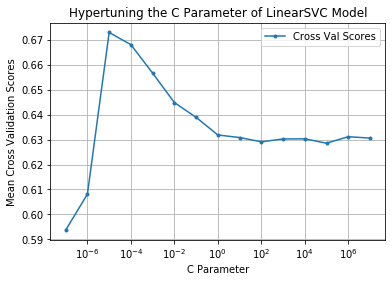

Wall time: 2min 48s


In [13]:
%%time
#Using cross validation score to find the best C value for the model
C = [10**x for x in range(-7,8)]
score = []
for c in C:
    print(c)
    lsvm2 = LinearSVC(C=c,max_iter = 5000)
    scores = np.mean(cross_val_score(lsvm2,XremainS,y_remain,cv=5,n_jobs=-1))
    score.append(np.mean(scores))

#plotted cross val scores against the C values 
plt.figure()
plt.plot(C,score,marker ='.',label = 'Cross Val Scores')
plt.xscale('log')
plt.legend()
plt.title('Hypertuning the C Parameter of LinearSVC Model')
plt.xlabel('C Parameter')
plt.ylabel('Mean Cross Validation Scores')
plt.grid()
plt.show()

The highest mean cross val score was found at C = 0.00001 

In [14]:
#Fitting the final mode for LinearSVC
lsvm_final = LinearSVC(C=0.00001,max_iter=5000)
lsvm_final.fit(XremainS,y_remain)
lsvm_y_pred = lsvm_final.predict(XtestS)

In [19]:
pd.DataFrame(confusion_matrix(y_test,lsvm_y_pred),columns=['Predicted Low Rating','Predicted High Rating'],index=['True Low Rating','True Higher Rating'])

,Predicted Low Rating,Predicted High Rating
True Low Rating,3761,745
True Higher Rating,1680,1344


In [15]:
lsvm_acc_score = accuracy_score(y_test,lsvm_y_pred)
print(f'The linearSVC model accuarcy score was found to be:{lsvm_acc_score*100}')

The linearSVC model accuarcy score was found to be:67.79548472775564


In [16]:
#Classification Report of both final models 
print('Log model Classification report:')
print('')
print(classification_report(y_test,log_y_pred))
print('LinearSVM Model Classification Report:')
print('')
print(classification_report(y_test,lsvm_y_pred))

Log model Classification report:

              precision    recall  f1-score   support

           0       0.69      0.85      0.76      4506
           1       0.66      0.42      0.51      3024

    accuracy                           0.68      7530
   macro avg       0.67      0.64      0.64      7530
weighted avg       0.67      0.68      0.66      7530

LinearSVM Model Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.83      0.76      4506
           1       0.64      0.44      0.53      3024

    accuracy                           0.68      7530
   macro avg       0.67      0.64      0.64      7530
weighted avg       0.67      0.68      0.66      7530



From all the analysis above, the classification report and both confusion matrix, it shows that the log model is better at predicting lower ratings games rather than the LinearSVM model and vise versa.

Both models did well and had some better scores in other areas, but for this project I'm going to be using the LinearSVM model since it can predict more highly rated games than lower rated games much better.

In [21]:
#dumped the lineanSVC model since it had a slightly better score 
joblib.dump(lsvm_final,'Models/linearSVM_model.plk')

['Models/linearSVM_model.plk']

In [22]:
#Created a function which would allow the target summary to be the same as the final dataframe above
def tokener(sentence):        
    '''
    DOC STRING
    
    Input: Takes a sentence which will remove punctuation marks, split on the words, and then stem
    said word in order to vectorize it after
    
    Output: The original sentence with stemmed words as as series.
    
    
    Example: 
    Input
    tokener('With tenure, Suzie’d have all the more leisure for yachting, but her publications are no good')  
    
    Output
    
    0    tenur suzi leisur yacht public good
    dtype: object
    
    '''
    
    
    from nltk.stem import PorterStemmer
    from nltk.corpus import stopwords
    stemmer = PorterStemmer()
    Stop_words = stopwords.words('english')
    import re
    
    sentence = re.sub('[^a-zA-z0-9]',' ',sentence)
    sentence = sentence.lower()
            
    words = sentence.split(' ')
    listofstemmedwords = []
    
    for word in words:
        if (word!='') and (word not in Stop_words):
            stemmed_word = stemmer.stem(word)
            listofstemmedwords.append(stemmed_word)
    
    complete = pd.Series(' '.join(listofstemmedwords))
    
    return complete

In [26]:
# This function takes a summary of a game and predicts it rating score either a 1 for good rating or 0 for low rating
def model_prediction(summary):
    '''
    DOC STRING
    
    Input: A string of a game summary.
    
    model_prediction('This is a test of the function')
    
    Output:
    
    Predicting Rating Score...
    Predicted Score:[0]
    
    
    '''
    import joblib
    import time
    
    summary = tokener(summary)
    vectorizer = joblib.load('Models/tfidf_vectorizer.plk')
    vectorized_summary = vectorizer.transform(summary)
    scale = joblib.load('Models/StandardScaler.plk')
    scaled_summary = scale.transform(vectorized_summary)
    model = joblib.load('Models/linearSVM_model.plk')
    model_score = model.predict(scaled_summary)
    print('Predicting Rating Score...')
    time.sleep(5)
    
    return(print(f'Predicted Score:{model_score}'))

In [30]:
test ="Welcome to the beautiful fantasy world of Teyvat. Step into a huge open-world of adventure and mystery, where heroic quests await. As a traveller from another world, you must find your lost sibling and unravel Teyvat's many secrets. Joined by Paimon, a kind-hearted sprite guide, your mission takes you through beautiful forests, bustling towns, and treacherous dungeons. And while your journey may put you into the path of merciless foes and fiendish puzzles you can count on numerous playable allies to join your custom party of four, harnessing the power of the elements to overcome all obstacles. Key Features: Explore Teyvat however you want Fly across the open-world, swim in a massive sea, climb mountains, and stray off the beaten path. Whether you decide to follow the storyline or just enjoy the gorgeous environment, Teyvat is yours to discover. Add up to four party members Choose who fights by your side, with over 30 characters to meet and create your party witheach possessing different abilities, personalities, and combat styles. Will you pick Jean, the acting grand master of the knights? Or Lisa, a witch harnessing the raw force of lightning? Master the seven elements Control and combine Pyro, Hydro, Electro, Anemo, Dendro, Cryo, and Geo to solve challenging puzzles and unleash powerful attacks. Travel alone or hunt together Charge head-on into battles by yourself, or invite your friends to join the fight against dangerous monsters, and discover the secrets of this vast world together."

In [29]:
model_prediction(test)

Predicting Rating Score...
Predicted Score:[0]
